DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_1544\3296981065.py:38: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Mean squared error: 0.26
Mean Absolute Error: 0.3557345230395244
Root Mean Squared Error: 0.5113852145595467


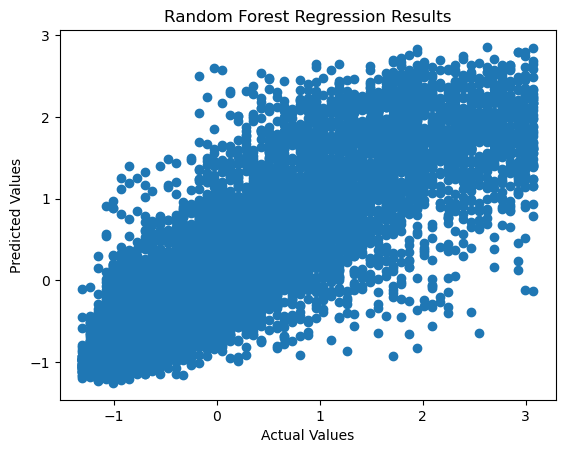

In [3]:
#USING RANDOM FOREST REGRESSOR MODEL WITH VISUALIZE 

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# USING FUNCTION TO HANDLE_OUTLIERS

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# DATAAET
df = pd.read_csv(r"C:\Users\nh013\Desktop\trafic control.csv\traffic.csv")

# FEATURE SELCECTION

df = df[['DateTime','Junction','Vehicles','ID']]

# IDENDIFY MISSING VALUES

print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES

df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)


# ONE -HOT  ENCODING
df = pd.get_dummies(df, columns=['Junction'])

#HANDLE OUTLIERS
df = handle_outliers(df, 'Vehicles')

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])


scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# ROLLING STATISTICS
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# DROP NAN VALUES
df.dropna(inplace=True)

# SPLIT DATA 
X = df.drop(['Vehicles', 'DateTime', 'ID'], axis=1)
y = df['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# FIT THE MODEL
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# PREDICTION
y_pred = rf.predict(X_test)

# EVALUATE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Results")
plt.show()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_1544\2693965228.py:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Epoch 1/50
890/890 [==============================] - 4s 3ms/step - loss: 0.2734 - val_loss: 0.2416
Epoch 2/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2539 - val_loss: 0.2367
Epoch 3/50
890/890 [==============================] - 2s 2ms/step - loss: 0.2483 - val_loss: 0.2336
Epoch 4/50
890/890 [==============================] - 2s 2ms/step - loss: 0.2500 - val_loss: 0.2344
Epoch 5/50
890/890 [==============================] - 2s 2ms/step - loss: 0.2490 - val_loss: 0.2438
Epoch 6/50
890/890 [==============================] - 2s 2ms/step - loss: 0.2506 - val_loss: 0.2327
Epoch 7/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2481 - val_loss: 0.2322
Epoch 8/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2465 - val_loss: 0.2329
Epoch 9/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2457 - val_loss: 0.2359
Epoch 10/50
890/890 [==============================] - 2s 2ms/step - loss: 0.2455 - val_loss: 0.2342

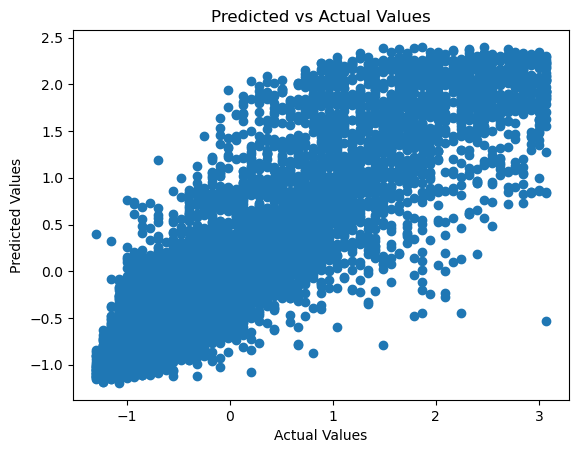

In [4]:
#TRAIN A NURAL NETWORK REGRESSON MODEL USING TENSORFLOW AND VISUALIZE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt



# USING FUNCTION TO HANDLE_OUTLIERS

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# DATAAET
df = pd.read_csv(r"C:\Users\nh013\Desktop\trafic control.csv\traffic.csv")

# FEATURE SELCECTION

df = df[['DateTime','Junction','Vehicles','ID']]

# IDENDIFY MISSING VALUES

print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES

df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)


# ONE -HOT  ENCODING
df = pd.get_dummies(df, columns=['Junction'])

#HANDLE OUTLIERS
df = handle_outliers(df, 'Vehicles')

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])


scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# ROLLING STATISTICS
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# DROP NAN VALUES
df.dropna(inplace=True)


# SPLIT DATA TRAINING INTO TESTING SET
X = df.drop(['Vehicles', 'DateTime', 'ID'], axis=1)
y = df['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#TRAIN NURAL NETWORK MODEL 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),#  128NEURONS
    tf.keras.layers.Dropout(0.2), #2 HIDDEN LAYERS
    tf.keras.layers.Dense(64, activation='relu'), #64 NEURONS
    tf.keras.layers.Dropout(0.2), #2 HIDDEN LAYERS
    tf.keras.layers.Dense(1, activation='linear')
])

# COMPILE THE MODEL
model.compile(loss='mean_squared_error', optimizer='adam')



# TRAIN MODEL
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# EVALUATE
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# PREDICTION
y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()